1. Prepare images and labels for model

In [11]:
#Imports
from PIL import Image
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Load labels
df = pd.read_csv('better_labels/all_findings/all_findings_expert_labels_test_labels.csv')
abnormal_labels = df[['Image ID','Abnormal']]
only_id = abnormal_labels['Image ID'].apply(lambda x: x.split('.')[0])
abnormal_labels['Image ID'] = only_id
abnormal_labels.head()

/tmp/ipykernel_338/126621766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_labels['Image ID'] = only_id


,Image ID,Abnormal
0,00029560_000,NO
1,00009437_005,NO
2,00002424_002,NO
3,00014525_022,YES
4,00030409_000,NO


In [13]:
#Get full path of images in labels
p = Path('.')
image_folders = [x / 'images' for x in p.iterdir() if x.is_dir and 'images_' in str(x)]
image_paths = []
image_ids = abnormal_labels['Image ID'].tolist()

for image_folder in image_folders:
    paths = [str(y) for y in image_folder.iterdir()]
    for path in paths:
        for image_id in image_ids:
            if image_id in path:
                image_paths.append(path)
                image_ids.remove(image_id)
                break;

In [14]:
#Changable size to resize
size = 300,300

True
images_005/images/00011023_000.png


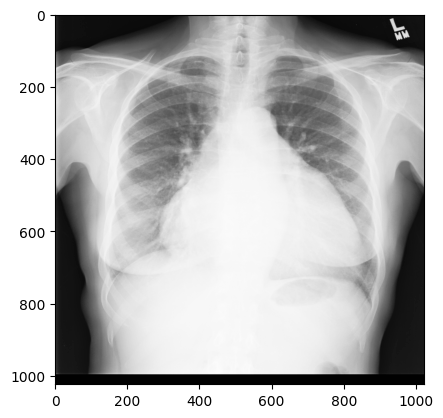

In [15]:
#Check if last step was sucesfull
print(len(image_paths) == len(df))
#810 images
print(image_paths[215])
temp_img = Image.open(image_paths[0])
plt.imshow(temp_img, cmap='Greys_r')

In [16]:


#Resize labeled images to smaller size and jpeg
for image_path in image_paths:
    try:   
        image = Image.open(image_path)
        image = image.resize(size).convert('RGB')
        image_name = 'small_images/' + image_path.split('/')[2].split('.')[0] + '.jpg'
        image.save(image_name, 'JPEG')
        print(image_name)
    
    except:
        print(f'image {image_path} not converted sucesfully')


small_images/00000211_006.jpg
small_images/00000211_022.jpg
small_images/00000211_028.jpg
small_images/00000211_029.jpg
small_images/00000218_002.jpg
small_images/00000246_016.jpg
small_images/00000457_001.jpg
small_images/00000506_012.jpg
small_images/00000506_017.jpg
small_images/00000583_057.jpg
small_images/00000583_066.jpg
small_images/00000618_000.jpg
small_images/00000643_005.jpg
small_images/00000643_006.jpg
small_images/00000744_001.jpg
small_images/00000756_000.jpg
small_images/00000756_002.jpg
small_images/00000830_003.jpg
small_images/00000830_005.jpg
small_images/00000882_004.jpg
small_images/00000882_006.jpg
small_images/00000902_000.jpg
small_images/00000902_003.jpg
small_images/00001093_009.jpg
small_images/00001093_010.jpg
small_images/00001369_000.jpg
small_images/00001376_002.jpg
small_images/00001437_052.jpg
small_images/00001534_002.jpg
small_images/00001534_009.jpg
small_images/00001555_003.jpg
small_images/00001673_001.jpg
small_images/00001673_003.jpg
small_imag

small_images/00012973_020.jpg
small_images/00013062_001.jpg
small_images/00013111_055.jpg
small_images/00013111_083.jpg
small_images/00013111_093.jpg
small_images/00013111_114.jpg
small_images/00013112_003.jpg
small_images/00013176_002.jpg
small_images/00013256_001.jpg
small_images/00013261_007.jpg
small_images/00013261_010.jpg
small_images/00013261_011.jpg
small_images/00013380_012.jpg
small_images/00013472_004.jpg
small_images/00013625_014.jpg
small_images/00013625_016.jpg
small_images/00013625_017.jpg
small_images/00013625_018.jpg
small_images/00013625_021.jpg
small_images/00013648_013.jpg
small_images/00013670_002.jpg
small_images/00013670_005.jpg
small_images/00013685_000.jpg
small_images/00013751_004.jpg
small_images/00013807_012.jpg
small_images/00013807_017.jpg
small_images/00013884_000.jpg
small_images/00013951_007.jpg
small_images/00013993_004.jpg
small_images/00014004_002.jpg
small_images/00014015_009.jpg
small_images/00014015_010.jpg
small_images/00014083_008.jpg
small_imag

small_images/00022415_002.jpg
small_images/00022416_059.jpg
small_images/00022572_065.jpg
small_images/00022572_067.jpg
small_images/00022572_089.jpg
small_images/00022706_000.jpg
small_images/00022717_008.jpg
small_images/00022726_004.jpg
small_images/00022726_010.jpg
small_images/00022726_018.jpg
small_images/00022765_000.jpg
small_images/00022787_000.jpg
small_images/00022837_009.jpg
small_images/00022837_019.jpg
small_images/00022837_022.jpg
small_images/00022837_025.jpg
small_images/00022837_044.jpg
small_images/00022899_004.jpg
small_images/00022899_012.jpg
small_images/00022961_005.jpg
small_images/00022977_000.jpg
small_images/00023026_002.jpg
small_images/00023026_003.jpg
small_images/00023058_003.jpg
small_images/00023065_024.jpg
small_images/00023065_032.jpg
small_images/00023068_001.jpg
small_images/00023068_002.jpg
small_images/00023075_012.jpg
small_images/00023078_006.jpg
small_images/00023085_002.jpg
small_images/00023085_008.jpg
small_images/00023283_007.jpg
small_imag

In [17]:
#Creates 0-1 normalized 2D matrix from Image ID
def img_to_arr(img_id):
    file = 'small_images'
    img_format = 'jpg'
    full_path = f'{file}/{img_id}.{img_format}'
    img = Image.open(full_path)
    arr = np.asarray(img)
    arr = list(map(lambda x: list(map(lambda y: int(sum(y)/3)/255.0, x)), arr))
    #this line shows progress :D
    print(img_id)
    return arr

00029560_000


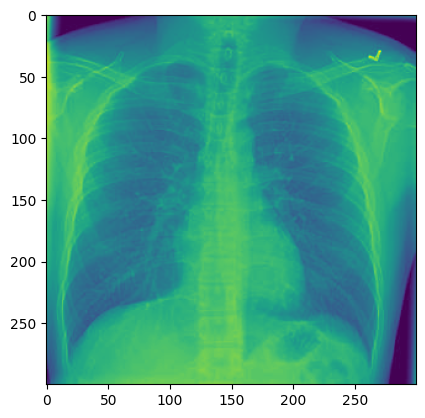

In [18]:
test_img_arr = img_to_arr('00029560_000')
plt.imshow(test_img_arr)
plt.show()

2. Train tf model

In [19]:
#Imports
#Tensorflow for model
import tensorflow as tf
#Scikit for test-train split
import sklearn.model_selection as sk
import time

In [20]:
#Load image arrays
#This may take some time
all_images = [img_to_arr(image) for image in abnormal_labels['Image ID']]

00029560_000
00009437_005
00002424_002
00014525_022
00030409_000
00030108_000
00030192_000
00019658_001
00013670_002
00017318_014
00028198_001
00028640_001
00021896_009
00021972_007
00011973_015
00000211_006
00018686_001
00019646_003
00026078_006
00000211_028
00005140_011
00011226_008
00012413_010
00028876_030
00027094_006
00028669_000
00019769_006
00019892_010
00017511_005
00029610_002
00030382_000
00013625_014
00029386_000
00017747_036
00012879_000
00007886_000
00028518_027
00001777_002
00004533_000
00006821_005
00016807_019
00016064_012
00011355_019
00029906_000
00022726_004
00030039_006
00009845_021
00011402_022
00028196_000
00028810_000
00029199_001
00028343_000
00014795_004
00018867_001
00002101_004
00029634_000
00000902_003
00004808_002
00018865_010
00011953_001
00003669_005
00018615_010
00026392_002
00029809_004
00027685_009
00014346_017
00009437_008
00014731_020
00015386_000
00008924_004
00004943_002
00019919_003
00016587_052
00005532_025
00009889_021
00012892_009
00003996_001

00029820_002
00016429_014
00023068_001
00029617_000
00013625_017
00021711_009
00010481_011
00008295_027
00007728_000
00003148_009
00028755_000
00014251_015
00029943_008
00014083_021
00018055_028
00014083_027
00012973_020
00021321_004
00011683_052
00022765_000
00021381_019
00016568_029
00029579_003
00029534_000
00007632_000
00019665_001
00000756_002
00025954_007
00012294_015
00026412_036
00000618_000
00004931_018
00019637_005
00009349_025
00028628_022
00019124_029
00027113_003
00030636_019
00025529_010
00027927_014
00022416_059
00006851_022
00025612_011
00026098_007
00016291_024
00018860_009
00004911_010
00021845_003
00019124_006
00028306_000
00029950_020
00014203_001
00014251_000
00021670_005
00010103_010
00029659_000
00013261_010
00019150_014
00011576_003
00001673_001
00030380_000
00007735_022
00015058_007
00016732_031
00029950_011
00023065_032
00029662_000
00029968_000
00027685_012
00019706_006
00012005_000
00021024_007
00022961_005
00025416_000
00017036_001
00017318_018
00016587_085

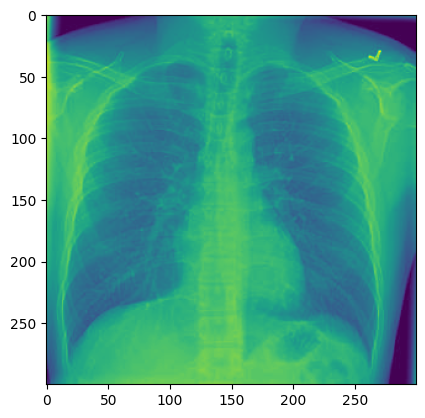

810

In [21]:
plt.imshow(all_images[0])
plt.show()
len(all_images)

In [22]:
#Load all labels
all_labels = [True if label == 'YES' else False for label in abnormal_labels['Abnormal']]

In [23]:
print(all_labels[0])
print(all_labels[3])
len(all_labels)

False
True


810

In [24]:
#Split data for training and testing
X_train, X_test, y_train, y_test = sk.train_test_split(all_images, all_labels, test_size = 0.5, random_state = 42)

In [25]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

405 405 405 405


In [39]:
#Some model I found on internet
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(size)),
                                   tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(2, activation=tf.nn.softmax)])

In [40]:
#Some model I found on internet part 2
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(X_train, y_train, epochs=5)
end = time.time()
print(end - start)

Epoch 1/5
13/13 [==============================] - 1s 41ms/step - loss: 39.5951 - accuracy: 0.5975
Epoch 2/5
13/13 [==============================] - 1s 40ms/step - loss: 2.5968 - accuracy: 0.6395
Epoch 3/5
13/13 [==============================] - 1s 40ms/step - loss: 0.6703 - accuracy: 0.6741
Epoch 4/5
13/13 [==============================] - 1s 40ms/step - loss: 0.5892 - accuracy: 0.7037
Epoch 5/5
13/13 [==============================] - 1s 43ms/step - loss: 0.5779 - accuracy: 0.7012
56.6933331489563


In [41]:
model.evaluate(X_test, y_test);

13/13 [==============================] - 0s 6ms/step - loss: 0.4960 - accuracy: 0.7432


In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 90000)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               23040256  
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 23,040,770
Trainable params: 23,040,770
Non-trainable params: 0
_________________________________________________________________


In [43]:
#Save the model
model.save('example_model')

INFO:tensorflow:Assets written to: example_model/assets


In [44]:
new_model = tf.keras.models.load_model('example_model')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 90000)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               23040256  
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 23,040,770
Trainable params: 23,040,770
Non-trainable params: 0
_________________________________________________________________


In [45]:
prediction_images = [all_images[15],all_images[114],all_images[357]]
predictions = new_model.predict(prediction_images)
print(predictions)

1/1 [==============================] - 0s 37ms/step
[[0.06679569 0.9332043 ]
 [0.20461437 0.79538566]
 [0.05169118 0.9483088 ]]
